### Tianjie Zhang

### Collaborator: Steven Kim

# CS534 Homework 3

Put your homework in the directory with your name. Please mentionin this file the names of any students with whom you collaborated. If you didn't collaborate with anyone, mark your collaborators as "None." Remember, your goal is to communicate. Full credit will be given only to correct solutions which are described clearly. Convoluted and obtuse descriptions will receive low marks. To complete your homework, you may ONLY consult the following material:

lecture slides course notes you or others took during lecture. the required text (CLRS) websites that may clarify the concepts covered in the material but do not in any way provide complete solutions to the problems. Deadline 04/27/2020

Please provide an answer to the following question:

# Question 1 (10 pts)
Write the explicit constraints (without using any vectorial notation, as a summation of single variables multiplied by a constant + bias term) of the Support Vector Machine to classify correctly iris dataset (Iris-Versicolor vs. others). In particular use 5 points in Iris-Versicolor, 2 points for iris-setosa, and 3 points for iris Virginia. Please show the points you selected and after the constraints

In [105]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [107]:
def val(s):
    if s==2:
        return -1
    elif s==0:
        return -1
    return s

y=np.array([val(x) for x in y])
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [109]:
print('The points selected:')
Versicolor_x,Versicolor_y=X[50:55],y[50:55]
print('Iris-Versicolor:\n',Versicolor_x,'\n',Versicolor_y)
setosa_x,setosa_y=X[0:2],y[0:2]

Virginia_x,Virginia_y=X[100:103],y[100:103]
print('Others:\n',setosa_x,'\n',Virginia_x,'\n',setosa_y,Virginia_y)

The points selected:
Iris-Versicolor:
 [[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]] 
 [1 1 1 1 1]
Others:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]] 
 [[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]] 
 [-1 -1] [-1 -1 -1]


we want to find a classifier that when $y_i=+1$, then $w_ix+b>1$, when when $y_i=-1$, then $w_ix+b<-1$
for Iris-versicolor:

$7w_1+3.2w_2+4.7w_3+1.4w_4+b \geq 1$

$6.4w_1+3.2w_2+4.5w_3+1.5w_4+b \geq 1$

$6.9w_1+3.1w_2+4.9w_3+1.5w_4+b \geq 1$

$5.5w_1+2.3w_2+4w_3+1.3w_4+b \geq 1$

$6.5w_1+2.8w_2+4.6w_3+1.5w_4+b \geq 1$

For others:

$5.1w_1+3.5w_2+1.4w_3+0.2w_4+b \leq -1$

$4.9w_1+3w_2+1.4w_3+0.2w_4+b \leq -1$

$6.3w_1+3.3w_2+6w_3+2.5w_4+b \leq -1$

$5.8w_1+2.7w_2+5.1w_3+1.9w_4+b \leq -1$

$7.1w_1+3w_2+5.9w_3+2.1w_4+b \leq -1$


# Question 2 (15 pts)

Implement the ADABoost algorithm by using the scikit implementation of the logistic regression. Evaluate the result on a real dataset between a single logistic regression and AdaBoost (use K-Fold cross validation).

This links can be helpful: http://rob.schapire.net/papers/explaining-adaboost.pdf and https://en.wikipedia.org/wiki/AdaBoost


### define the K-fold cross validation

In [143]:
from sklearn.model_selection import StratifiedKFold,KFold

### A single logistic regression

In [142]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

def val(s):
    if s==2:
        return -1
    elif s==0:
        return -1
    return s

y=np.array([val(x) for x in y])



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)#, stratify=y)
#scaler
# scaler = StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)



avgF1=0
cv=10
skf = StratifiedKFold(n_splits=cv,random_state=10,shuffle=True )
for train_index, val_index in skf.split(X, y):
    X_train1=X[train_index]
    X_val=X[val_index]
    y_train1=y[train_index]
    y_val=y[val_index]
    clf=LogisticRegression()
    clf.fit(X_train1,y_train1)
    y_pred_val=clf.predict(X_val)
    avgF1+=f1_score(y_val, y_pred_val, average='macro')
    print(f1_score(y_val, y_pred_val, average='macro'))
avgF1=avgF1/cv

avgF1

#K_fold(LogisticRegression(),X, y)

# pipeline = make_pipeline(StandardScaler(),
#                         LogisticRegression())
# #
# # Fit the model
# #
# pipeline.fit(X_train, y_train)

# pipeline.predict(X_test)
# #
# # Model scores on test and training data
# #
# print('Model test Score: %.3f, ' %pipeline.score(X_test, y_test),
#       'Model training Score: %.3f' %pipeline.score(X_train, y_train))

0.6590909090909092
0.7204968944099379
0.4444444444444444
0.4444444444444444
0.5833333333333333
0.6590909090909092
0.8611111111111112
0.7204968944099379
0.6590909090909092
0.5833333333333333


0.6334933182759269

### AdaBoost

In [147]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold,KFold

def error_compute(y,y_hat,w_i):
    
    err=sum(np.not_equal(y,y_hat).astype(int)*w_i)/sum(w_i)
    
    #err=sum(accuracy_score(y,y_hat)*w_i)/sum(w_i)
    
    return err

def alpha(err):
    
    alpha = 0.5*np.log((1-err)/err)
    
    return alpha
    
def update_w(w_i,alpha,y,y_hat):
    
    #w=w_i*np.exp(alpha*np.not_equal(y,y_hat).astype(int))
    w=w_i*np.exp(-alpha*y*y_hat)
    return w


class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []

    def fit(self, X, y, M = 100):

        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            
            if m == 0:
                w_i = np.ones(len(y)) * 1 / len(y) 
            else:
                w_i = update_w(w_i, alpha_m, y, y_hat)
            
            G_m = LogisticRegression() 
            G_m.fit(X, y, sample_weight = w_i)
            y_hat = G_m.predict(X)
            
            self.G_M.append(G_m) 

            error_m = error_compute(y, y_hat, w_i)
            
            self.training_errors.append(error_m)

            alpha_m = alpha(error_m)
            
            self.alphas.append(alpha_m)

        assert len(self.G_M) == len(self.alphas)
        
    def predict(self, X):


            weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

            for m in range(self.M):
                y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
                weak_preds.iloc[:,m] = y_pred_m

            y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

            return y_pred
    
#ab = AdaBoost()
#ab.fit(X_train, y_train, M = 400)

#y_hat= ab.predict(X_test)

#accuracy_score(y_hat,y_test)

### Kfold

In [148]:
avgF1=0
cv=10
skf = StratifiedKFold(n_splits=cv,random_state=10,shuffle=True )
for train_index, val_index in skf.split(X, y):
    X_train1=X[train_index]
    X_val=X[val_index]
    y_train1=y[train_index]
    y_val=y[val_index]
    clf=AdaBoost()
    clf.fit(X_train1,y_train1,M=400)
    y_pred_val=clf.predict(X_val)
    avgF1+=f1_score(y_val, y_pred_val, average='macro')
    print(f1_score(y_val, y_pred_val, average='macro'))
avgF1=avgF1/cv
avgF1

0.9206349206349207
0.9206349206349207
0.8295454545454545
0.9206349206349207
0.9206349206349207
0.8295454545454545
0.9282296650717703
0.9282296650717703
1.0
0.9282296650717703


0.9126319586845902

### It shows that the result from Adaboost has a higher accuracy than the result from a single Logistic regression.

## Question 3 (10 pts)
Use DBscan (try with different parameters) and K-means (K=3) on IRIS Dataset and discuss/compare the results with the iris ground truth.
Please provide an explanation of why K-fold cross validation is not required for the comparison among these different algorithms.

In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [10]:
iris = datasets.load_iris()

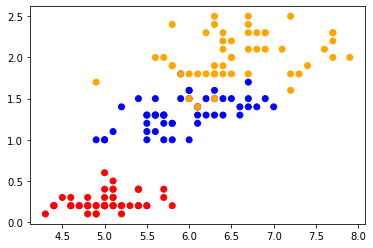

In [11]:
#print(iris)
X = iris.data
y = iris.target
color=['red','blue','orange','black', 'purple','pink']
plt.scatter(X[:,0], X[:,3],  c=np.array([color[x] for x in y] ))
plt.show()

### DBscan:

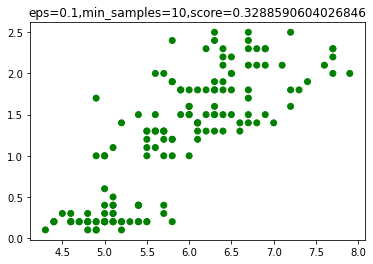

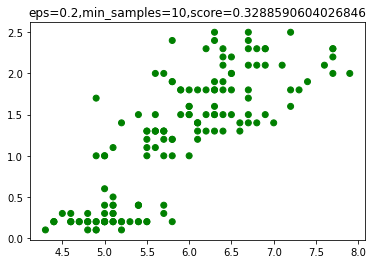

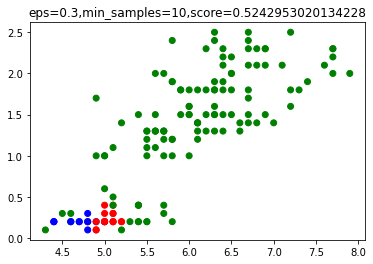

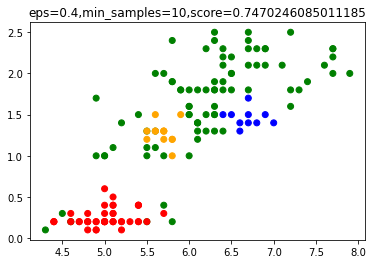

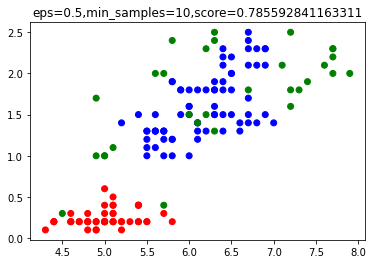

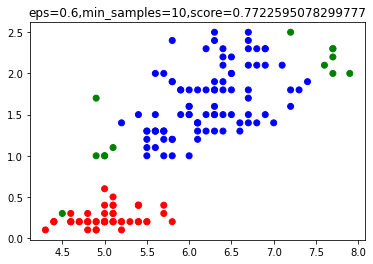

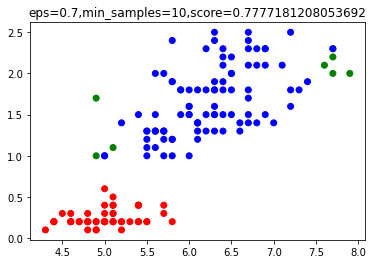

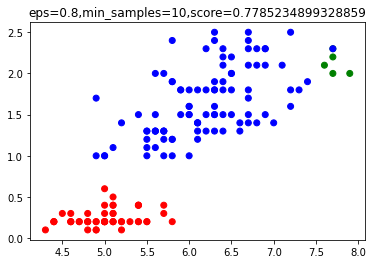

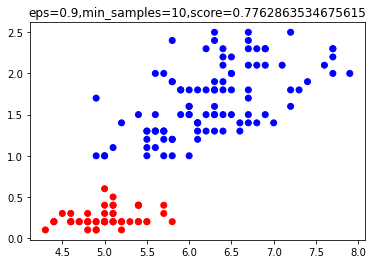

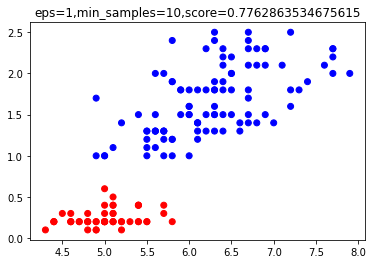

In [52]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import rand_score
score=[]
for eps in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    for min_samples in [10]:
        pred = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X)
        
        score.append(rand_score(y,pred))


        plt.scatter(X[:,0], X[:,3],  c=np.array([color[x%6] if x>=0 else 'green' for x in pred ] ))
        plt.title('eps='+str(eps)+',min_samples='+str(min_samples)+',score='+str(rand_score(y,pred)))#,'min_samples=%d'%min_samples)
        plt.show()

In [55]:
import pandas as pd

a=np.array([[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],score])

data=pd.DataFrame(a.T,columns=['eps','score'])
data


,eps,score
0,0.1,0.328859
1,0.2,0.328859
2,0.3,0.524295
3,0.4,0.747025
4,0.5,0.785593
5,0.6,0.772260
6,0.7,0.777718
7,0.8,0.778523
8,0.9,0.776286
9,1.0,0.776286


Text(0, 0.5, 'score')

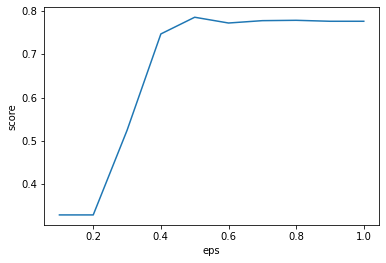

In [58]:
plt.plot(data['eps'],data['score'])
plt.xlabel('eps')
plt.ylabel('score')

### Thus, when eps=0.5, the DBscan algorithm got the highest accuracy. 

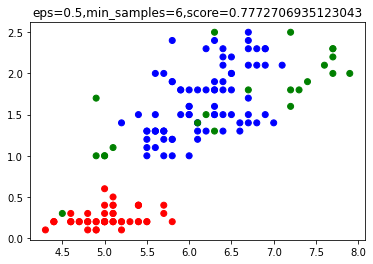

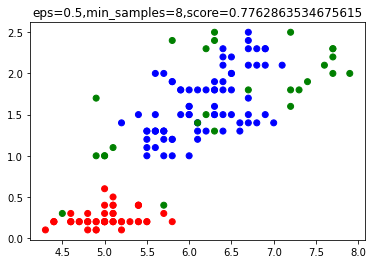

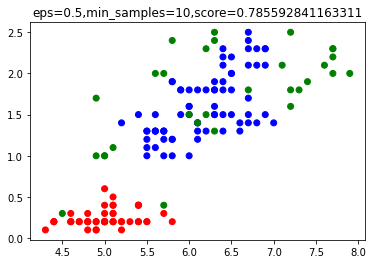

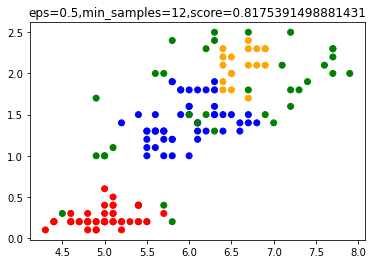

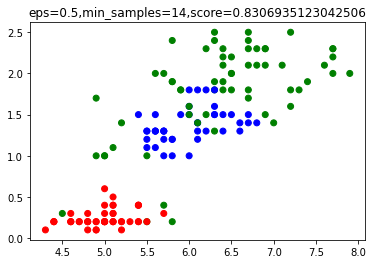

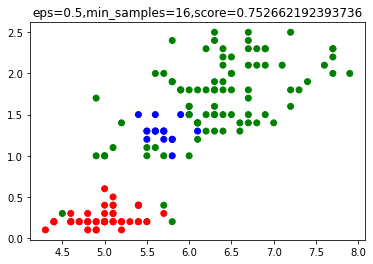

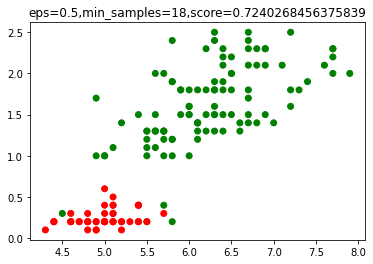

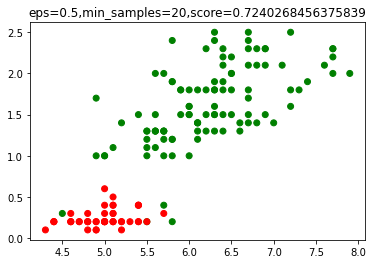

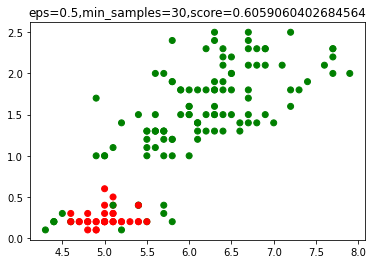

In [70]:
score=[]
for eps in [0.5]:
    for min_samples in [6,8,10,12,14,16,18,20,30]:
        pred = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X)
        
        score.append(rand_score(y,pred))


        plt.scatter(X[:,0], X[:,3],  c=np.array([color[x%6] if x>=0 else 'green' for x in pred ] ))
        plt.title('eps='+str(eps)+',min_samples='+str(min_samples)+',score='+str(rand_score(y,pred)))#,'min_samples=%d'%min_samples)
        plt.show()

In [68]:
a=np.array([[6,8,10,12,14,16,18,20,30],score])

data=pd.DataFrame(a.T,columns=['min_samples','score'])
data


,min_samples,score
0,6.0,0.774765
1,8.0,0.775123
2,10.0,0.777271
3,12.0,0.776286
4,14.0,0.785593
5,16.0,0.817539
6,18.0,0.830694
7,20.0,0.724027
8,30.0,0.605906


Text(0, 0.5, 'score')

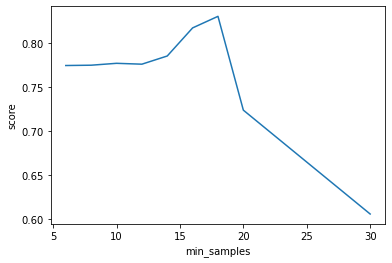

In [69]:
plt.plot(data['min_samples'],data['score'])
plt.xlabel('min_samples')
plt.ylabel('score')

### when the min_samples=18, the DBsacn got the best prediction result.

### K-means:

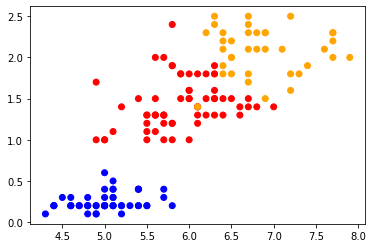

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score
clustering = KMeans(n_clusters=3, random_state=0).fit(X)
pred=clustering.predict(X)
plt.scatter(X[:,0], X[:,3],  c=np.array([color[x] for x in pred] ))
plt.show()

In [41]:
rand_score(y, pred)

0.8797315436241611

### Discuss and compare the result:

It shows apparent that the k-means method is more consistant with the ground truth. 

In DBscan method, the parameter makes a big difference in the accuracy of classification. eps=0.5 and min_samples=18 get the best classification result.


K-fold cross validation is not required for the comparison among these different algorithms. The K-fold cross validation would ask for missing some points in the dataset. It will cause different sub-dataset which would change the center of the whole data leading to totally different results.

# Extra Points ( 5pts)
An unbalanced dataset (e.g. 95% vs 5%) can be problematic even in the training phase. The learned function can be trivial, e.g. always predicting one class.
A possible solution can have a weight for each point in the way that making a mistake in the minority class will coun more w.r.t. the other. Please redefine the likelihood of the logistic regression to consider these weights for each point. Please compute the log-likelihood and its derivatives.
In addition, add to the negative log-likelihood the norm of W (sum of the square of each component) and compute the derivatives.

---

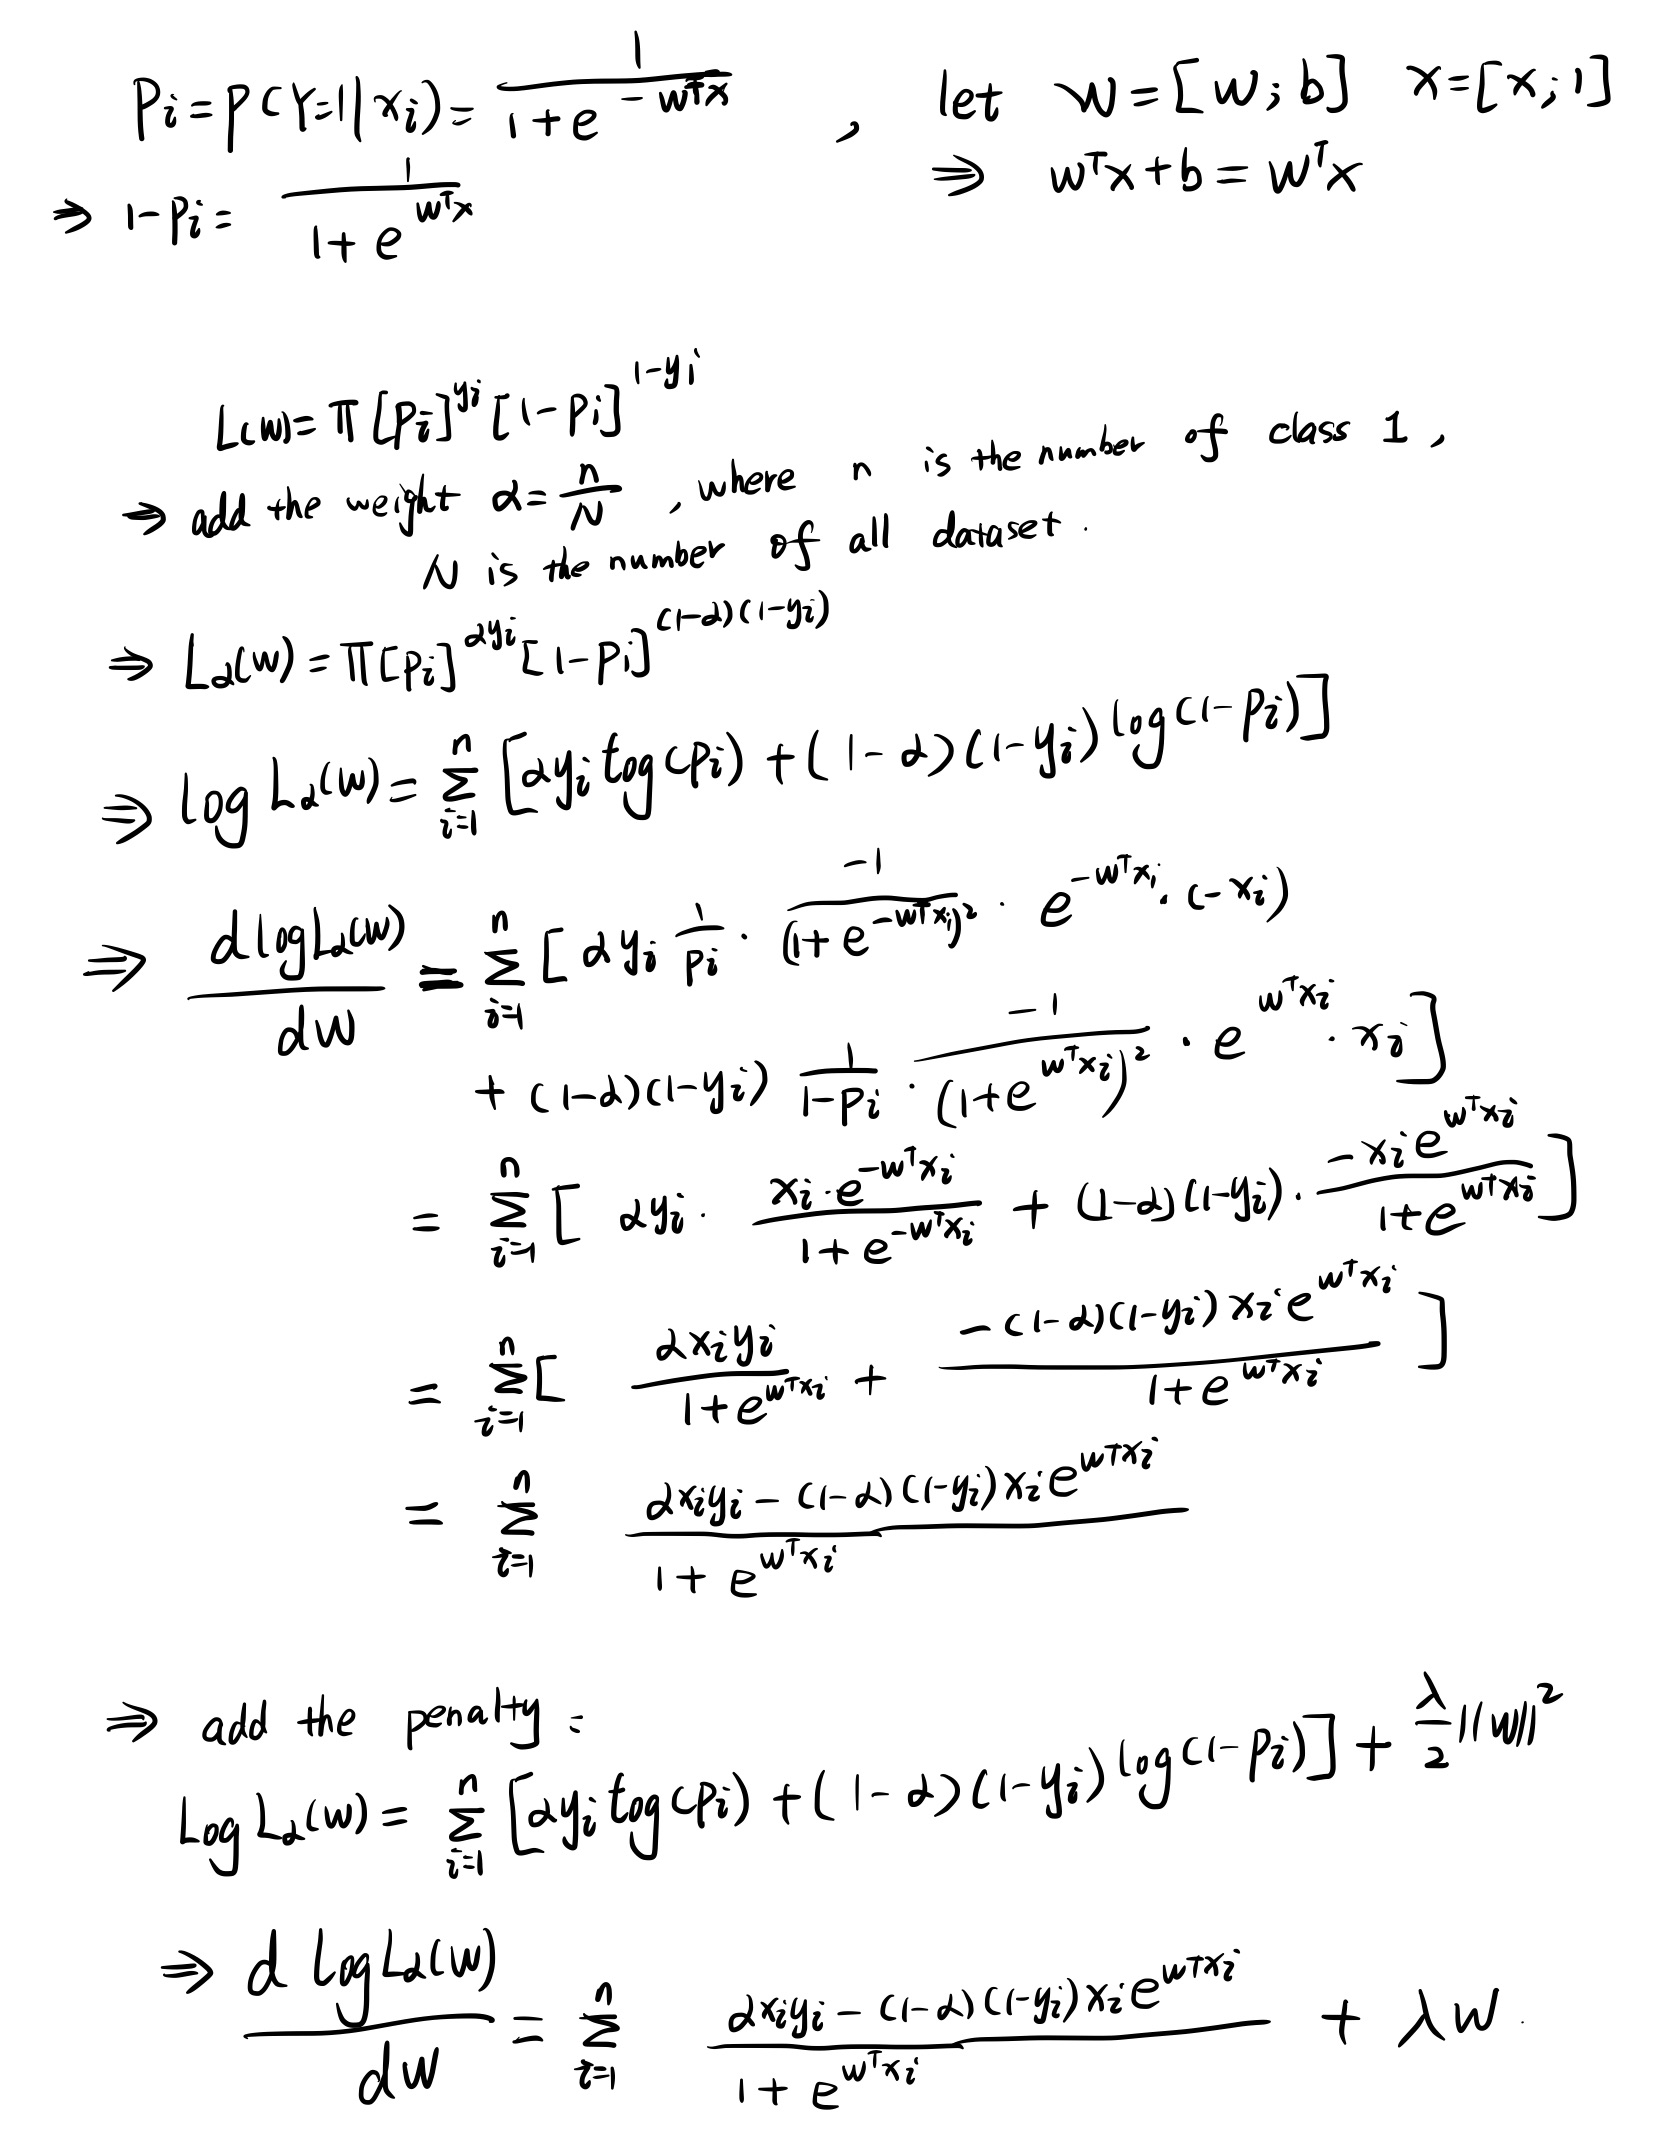